In [8]:
# necessary imports

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# data load

filename = 'titanic.csv'

titanic_df = pd.read_csv(filename)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# data preprocessing - cleaning and encoding of categorical Features

# XGBoost doesn't require re-scaling or One Hot Encoding

titanic_df.dropna(axis=0, inplace=True)

titanic_df['Sex'] = titanic_df['Sex'].map({'female':1, 'male':0})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0


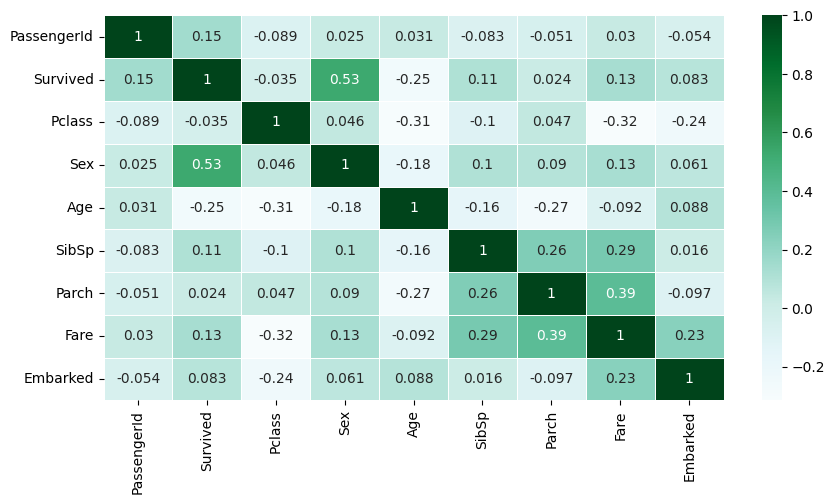

In [12]:
# Correlation analysis to determine features
# numerical features 
df_corr = titanic_df.drop(columns=['Name','Ticket','Cabin'])

df_corr = df_corr.corr()

fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(df_corr, annot = True, cmap = 'BuGn', linewidths=0.5)
plt.show()

# Sex, Age, Fare, and Embarked are most correlated with 'Survived'

In [13]:
# XGBoost (Gradient Boosting)

X = titanic_df[['Age', 'Fare', 'Sex', 'Embarked']]
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# 2) Initialise XGBoost Classifier
clf = XGBClassifier()

# 3) Hyperparameter Tuning
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10],
              'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3],
              'n_estimators':[25,50,100,150]}  

model = GridSearchCV(estimator = clf, param_grid = parameters, cv=5, scoring = 'recall')

# 3) Fit and Predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4) Evaluate model performance
acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'ROC AUC is {roc_auc}')
print(f'F1 score is {f1}')
print(f'Recall is {re}')
print(f'Precision is {pr}')
print(f'Accuracy Score: {acc:.4f}')

ROC AUC is 0.6765734265734266
F1 score is 0.8076923076923077
Recall is 0.8076923076923077
Precision is 0.8076923076923077
Accuracy Score: 0.7297


In [ ]:
# accuracy: true positives + true negatives / total - overall correctness of the model
# recall: true positives / true positives + false negatives